<ErrorbarContainer object of 3 artists>

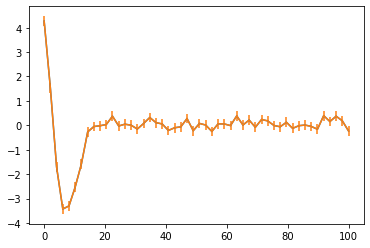

In [3]:
## Fitting
from numpy import exp, sin
from numpy import linspace, random
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
import numpy as np

## Use of scipy optimizer (lmfit)
def residual(variables, x, data, eps_data):
    """Model a decaying sine wave and subtract data."""
    amp = variables[0]
    phaseshift = variables[1]
    freq = variables[2]
    decay = variables[3]

    model = amp * sin(x*freq + phaseshift) * exp(-x*x*decay)

    return (data-model) / eps_data

# generate synthetic data with noise
x = linspace(0, 100)
error_scale = 0.2
input_para = np.array([7.5, 0.22, 2.5, 0.01])
eps_data = random.normal(size=x.size, scale=error_scale)
data = input_para[0] * sin(x*input_para[1] + input_para[2]) * exp(-x*x*input_para[3]) + eps_data
plt.plot(x, data)
plt.errorbar(x, data,error_scale)



In [4]:
## fitting with least square from scipy
init_variables = [10.0, 0.2, 3.0, 0.007]
out = leastsq(residual, init_variables, args=(x, data, eps_data))
print("fitting_result:", out)
print("input_params:", input_para)



fitting_result: (array([7.62067116, 0.63076414, 2.8596004 , 0.01025722]), 1)
input_params: [7.5  0.22 2.5  0.01]


In [5]:
## fitting with the Levenberg–Marquardt algorithm (LM method)
from numpy import exp, sin
import numpy as np
from lmfit import minimize, Parameters
import lmfit

def residual(params, x, data, eps_data):
    amp = params['amp']
    phaseshift = params['phase']
    freq = params['frequency']
    decay = params['decay']
    model = amp * sin(x*freq + phaseshift) * exp(-x*x*decay)
    return (data-model) / eps_data


params = Parameters()
params.add('amp', value=10, min=3, max = 11)
params.add('decay', value=0.007)
params.add('phase', value=0.2)
params.add('frequency', value=3.0)

out = minimize(residual, params, args=(x, data, eps_data))
print(out.params)
print(lmfit.fit_report(out.params))


Parameters([('amp', <Parameter 'amp', value=7.620699559085539 +/- 0.358, bounds=[3:11]>), ('decay', <Parameter 'decay', value=0.010257265285877904 +/- 0.000584, bounds=[-inf:inf]>), ('phase', <Parameter 'phase', value=0.6307624831337363 +/- 0.0266, bounds=[-inf:inf]>), ('frequency', <Parameter 'frequency', value=2.859600936848081 +/- 0.0072, bounds=[-inf:inf]>)])
[[Variables]]
    amp:        7.62069956 +/- 0.35816680 (4.70%) (init = 10)
    decay:      0.01025727 +/- 5.8406e-04 (5.69%) (init = 0.007)
    phase:      0.63076248 +/- 0.02663557 (4.22%) (init = 0.2)
    frequency:  2.85960094 +/- 0.00719859 (0.25%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(phase, frequency) = -0.903
    C(amp, decay)       =  0.885
    C(amp, frequency)   =  0.787
    C(decay, frequency) =  0.711
    C(amp, phase)       = -0.633
    C(decay, phase)     = -0.607
